In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Load and Transform Data

In [68]:
file_path='data/SET50_EMA10_Week_09T22.csv'
folder_name,file_name = os.path.split(file_path)
result_path=f'{folder_name}/Report-{os.path.splitext(file_name)[0]}.xlsx'

print(file_name)
print(result_path)

SET50_EMA10_Week_09T22.csv
data/Report-SET50_EMA10_Week_09T22.xlsx


In [69]:


df=pd.read_csv(file_path,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
print(list(df.columns))
df=df['01-2009':'12-2022']
print(df.info())
print(df.head())

no_threshold=1
lookback=1

['Ticker', 'EMA10']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2009-01-09 00:00:00 to 2022-12-30 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  730 non-null    object 
 1   EMA10   730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.1+ KB
None
           Ticker   EMA10
Date/Time                
2009-01-09  SET50  316.55
2009-01-16  SET50  314.02
2009-01-23  SET50  311.60
2009-01-30  SET50  310.15
2009-02-06  SET50  309.99


In [70]:
colSumSince='EMA10'
#colSumSince='Signal10_20_15'
# def create_trend_feature(df,colSumSince):


In [71]:
df=df.reset_index(drop=False)
df_date=df[['Date/Time']]
df=df[[colSumSince]]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMA10   730 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


,EMA10
0,316.55
1,314.02
2,311.60
3,310.15
4,309.99


# Sum and Count Trend

In [72]:
colUp=f'{colSumSince}_Up'
colUpCount=f'{colSumSince}_UpCount'
colDown=f'{colSumSince}_Down'
colDownCount=f'{colSumSince}_DownCount'

def find_sum_trend(lookback=1,trendID=1):  # 1=up 0=down
  sumsinceList=[]
  countList=[]
  sum_x=0
  for i in range(0, len(df)):
        if i<lookback:
            sumsinceList.append(0)
            countList.append(0)
        elif i>=lookback:
          logic= df.loc[i,colSumSince] > df.loc[i-lookback,colSumSince] if trendID==1 else df.loc[i,colSumSince] <= df.loc[i-lookback,colSumSince]
          if logic:
             sum_x=sum_x+1
             sumsinceList.append(sum_x)  
             countList.append(1)
          else:
            sum_x=0
            sumsinceList.append(0)   
            countList.append(0)  
  return sumsinceList,countList


# Wait implemet
# def find_sum_and_pct_trend(lookback=1,trendID=1):  # 1=up 0=down
#   sumsinceList=[]
#   countList=[]
#   sum_x=0
#   for i in range(0, len(df)):
#         if i<lookback:
#             sumsinceList.append(0)
#             countList.append(0)
#         elif i>=lookback:
#           logic= df.loc[i,colSumSince] > df.loc[i-lookback,colSumSince] if trendID==1 else df.loc[i,colSumSince] <= df.loc[i-lookback,colSumSince]
#           if logic:
#              sum_x=sum_x+1
#              sumsinceList.append(sum_x)  
#              countList.append(1)
#           else:
#             sum_x=0
#             sumsinceList.append(0)   
#             countList.append(0)  
#   return sumsinceList,countList


In [73]:
sum_up,count_up= find_sum_trend(lookback=lookback,trendID=1)
sumUpDF=pd.DataFrame ( {colUp:sum_up,colUpCount:count_up})
sumUpDF

,EMA10_Up,EMA10_UpCount
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
725,6,1
726,0,0
727,1,1
728,0,0


In [74]:
sum_down,count_down=find_sum_trend(lookback=lookback,trendID=0)
sumDownDF=pd.DataFrame ( {colDown:sum_down,colDownCount:count_down})
sumDownDF

,EMA10_Down,EMA10_DownCount
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
725,0,0
726,1,1
727,0,0
728,1,1


In [75]:
df_x=pd.concat([df_date,df,sumUpDF,sumDownDF],axis=1)
df_x.set_index('Date/Time',inplace=True)
print(df_x.info())

# df_x.to_csv("X.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2009-01-09 00:00:00 to 2022-12-30 00:00:00
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EMA10            730 non-null    float64
 1   EMA10_Up         730 non-null    int64  
 2   EMA10_UpCount    730 non-null    int64  
 3   EMA10_Down       730 non-null    int64  
 4   EMA10_DownCount  730 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.2 KB
None


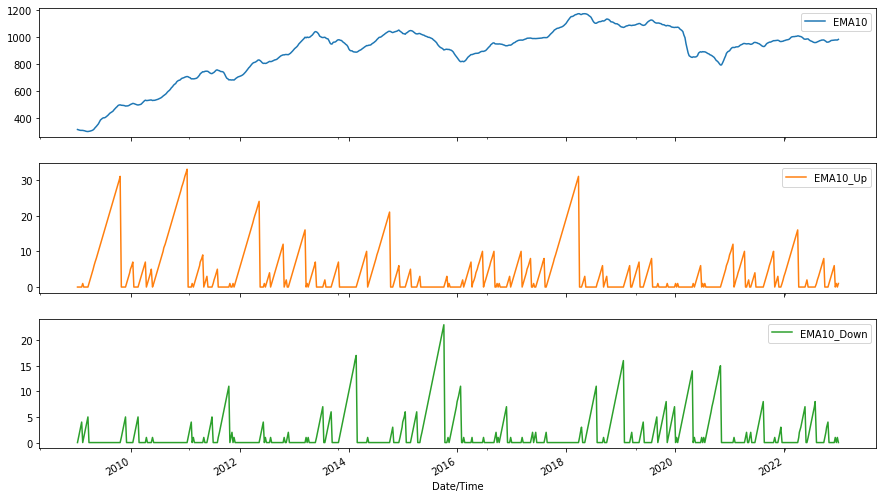

In [76]:
dfPlot=df_x[[colSumSince,colUp,colDown]]

colToPlots=dfPlot[[colSumSince,colUp,colDown]].columns

dfPlot.plot(kind='line',layout=(len(colToPlots),1),
                      subplots=True,figsize=(15, 3*len(colToPlots)))
   
plt.show()

# Group Trend to find distrubution

In [77]:
df_x.reset_index(drop=False,inplace=True)
df_x.rename(columns={"Date/Time":"Date"},inplace=True)


# filter only uptrend to group count
dfUp=df_x.query(f"{colUp}>0").reset_index(drop=True).loc[:,['Date',colUp]]



# filter only downtrend to group count
dfDown=df_x.query(f"{colDown}>0").reset_index(drop=True).loc[:,['Date',colDown]]


In [78]:
def group_trend(dfGroup,colTrend):  # Up=up Down=down  and grou
  groupList=[]
  group_name=''
  for i in range(0, len(dfGroup)):
    if i==0:
      group_name=dfGroup.loc[i,'Date'].strftime("%d%b%y")  
      groupList.append(group_name)  
    else:
       if dfGroup.loc[i,colTrend]> dfGroup.loc[i-1,colTrend]:
         groupList.append(group_name) 
       else:
         group_name=dfGroup.loc[i,'Date'].strftime("%d%b%y")  
         groupList.append(group_name)  
         
  return groupList


In [79]:
colGroupUp='Up'
groupUp=group_trend(dfUp,colUp)
dfUp=pd.concat([dfUp,pd.DataFrame({colGroupUp:groupUp})],axis=1)
print(dfUp.info())
print(dfUp)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      442 non-null    datetime64[ns]
 1   EMA10_Up  442 non-null    int64         
 2   Up        442 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.5+ KB
None
          Date  EMA10_Up       Up
0   2009-02-13         1  13Feb09
1   2009-03-27         1  27Mar09
2   2009-04-03         2  27Mar09
3   2009-04-10         3  27Mar09
4   2009-04-17         4  27Mar09
..         ...       ...      ...
437 2022-11-18         4  28Oct22
438 2022-11-25         5  28Oct22
439 2022-12-02         6  28Oct22
440 2022-12-16         1  16Dec22
441 2022-12-30         1  30Dec22

[442 rows x 3 columns]


In [89]:
trend_range=[0, 2,3, 5, 10, 15, 20,25,30]

In [98]:
dfUpGroupX=dfUp.groupby([colGroupUp])[[colUp]].max()
dfUpGroupX=dfUpGroupX.query(f"{colUp}>=@no_threshold")
dfUpGroupX=dfUpGroupX.sort_values(by=colUp,ascending=False)
# dfUpGroupX['TrendRange'] = pd.cut(dfUpGroupX[colUp], bins=4, labels=False)
print(len(dfUpGroupX))
dfUpGroupX




67


,EMA10_Up
Up,
04Jun10,33
27Mar09,31
25Aug17,31
02Dec11,24
16May14,21
...,...
18Nov11,1
17Jul20,1
17Jan20,1


In [99]:

dfUpGroupX.groupby([colUp]).size()

EMA10_Up
1     19
2      5
3      7
4      2
5      3
6      5
7      6
8      4
9      1
10     6
12     2
16     2
21     1
24     1
31     2
33     1
dtype: int64

In [81]:
colGroupDown='Down'
groupDown=group_trend(dfDown,colDown)
dfDown=pd.concat([dfDown,pd.DataFrame({colGroupDown:groupDown})],axis=1)
print(dfDown.info())
print(dfDown)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        287 non-null    datetime64[ns]
 1   EMA10_Down  287 non-null    int64         
 2   Down        287 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.9+ KB
None
          Date  EMA10_Down     Down
0   2009-01-16           1  16Jan09
1   2009-01-23           2  16Jan09
2   2009-01-30           3  16Jan09
3   2009-02-06           4  16Jan09
4   2009-02-20           1  20Feb09
..         ...         ...      ...
282 2022-10-07           2  30Sep22
283 2022-10-12           3  30Sep22
284 2022-10-21           4  30Sep22
285 2022-12-09           1  09Dec22
286 2022-12-23           1  23Dec22

[287 rows x 3 columns]


In [67]:
dfDownGroupX=dfDown.groupby([colGroupDown])[[colDown]].max()
dfDownGroupX=dfDownGroupX.query(f"{colDown}>=@no_threshold")
dfDownGroupX=dfDownGroupX.sort_values(by=colDown,ascending=False)
print(len(dfDownGroupX))
dfDownGroupX

31


,EMA10_Down
Down,
30Apr15,23
01Nov13,17
05Oct18,16
24Jul20,15
24Jan20,14
13Nov15,11
11Aug11,11
11May18,11
25Jun21,8


<AxesSubplot: ylabel='Frequency'>

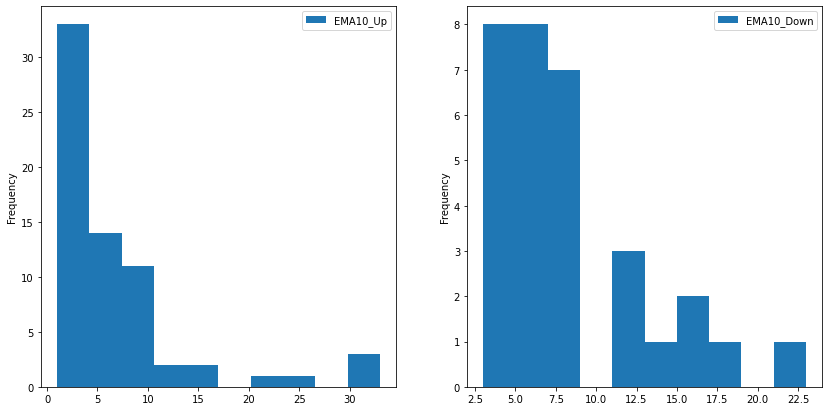

In [82]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(14,7))
dfUpGroupX.plot.hist(ax=ax1)
dfDownGroupX.plot.hist(ax=ax2)

In [27]:
#return  df_x,dfUpGroupX,dfDownGroupX

In [28]:
# writer=pd.ExcelWriter(result_path,engine='xlsxwriter') 

# df_x.to_excel(writer, sheet_name="All-Trend",index=False)
# dfUp.to_excel(writer,sheet_name="UpTrend",index=False)
# dfUpGroupX.to_excel(writer,sheet_name="UpSummary",index=True)
# dfDown.to_excel(writer,sheet_name="DownTrend",index=False)
# dfDownGroupX.to_excel(writer,sheet_name="DownSummary",index=True)
# writer.save()